
<br>
    The objective of this exercise is to study the signal of ECG during atrial<br>
    fibrilation (AF). The signal analysed contains different type of AF with<br>
    stable repolarisation loops and random AF.<br>


In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp


<br>
    The first signal is an ECG with atrial fibrilation.<br>
    Q: What are the differences of this ECG with a normal ECG?<br>


### Answer


The main differences we can notice are the following :

- The QRS complexes are not evenly spaced. We can notice this by looking at the R peaks ;
- The P waves that should occur are pretty much non-existant and are replaced by some noise coming from the fibrillatory waves ;
- The S waves are also really noisy.



In [2]:
ecg = np.genfromtxt('ecg_af.dat')
ecg_fs = 300
t_ecg = np.arange(len(ecg))/ecg_fs

(210.0, 215.0)

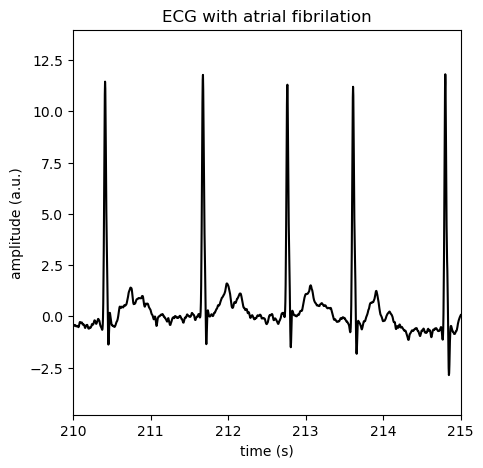

In [3]:
py.figure(1,figsize=[5,5])
py.plot(t_ecg, ecg, 'k')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG with atrial fibrilation')
py.xlim(210, 215)


<br>
    We compute the autocorelation of the ECG signal.<br>
    In order to discard the modulation of the baseline we first apply a<br>
    high-pass filter with a cut-off frequency of 0.5 Hz.<br>
    Q: Do you see a specific pattern that permits to characterize the atrial<br>
        fibrilation?<br>

### Answer

The autocorrelation of a signal gives the relationship between this signal and a shifted version of itself, meaning if our ECG were normal we would have peaks at each period of the heartbeat, each being obviously smaller than $R_{xx}(0)$ but we would still notice peaks. Here, apart from the peak at $R_{xx}(0)$ the autocorrelation averages around 0, which shows the irregular pattern of atrial fibrilation.





In [4]:
b, a = sp.butter(2, 0.5/ecg_fs*2, btype='high')

In [5]:
ecg_hp = sp.filtfilt(b, a, ecg)

In [6]:
rxx_ecg = np.correlate(ecg_hp, ecg_hp, mode='full') 
k = np.arange(len(rxx_ecg))-len(rxx_ecg)//2

(-500.0, 500.0)

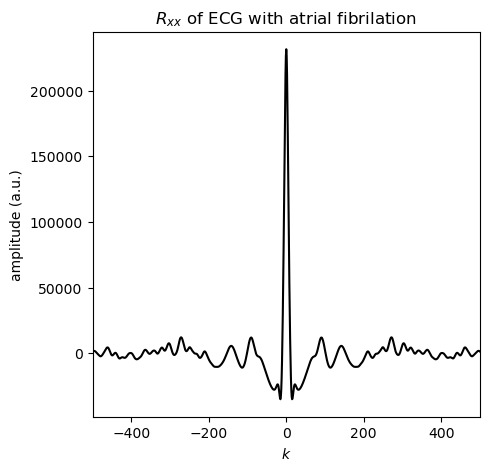

In [7]:
py.figure(2,figsize=[5,5])
py.plot(k, rxx_ecg, 'k')
py.xlabel('$k$')
py.ylabel('amplitude (a.u.)')
py.title('$R_{xx}$ of ECG with atrial fibrilation')
py.xlim(-500, 500)


<br>
    Compute the PSD of the ECG signal.<br>
    Q: What do you see?<br>

### Answer

We notice that there is no distinct frequency to highlight when there is an atrial fibrilation, the power of our signal is much more spread out in the higher frequencies which is probably caused by the atrial fibrilations. This is to be expected, since we have an irregular signal.





In [8]:
f, ECG = sp.welch(ecg_hp, nperseg=500, nfft=4096, noverlap=250, fs=ecg_fs)

(0.0, 60.0)

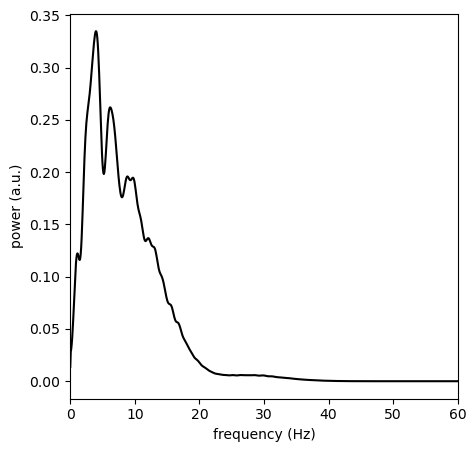

In [9]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(f, ECG, 'k')
py.xlabel('frequency (Hz)')
py.ylabel('power (a.u.)')
py.xlim(0,60)


<br>
    In order to higlight the signal related to the repolarisation of the<br>
    atria and ECG signal with atrial fibrilation has been process, keeping only<br>
    the P wave (repolarisation of the atria) and the QRST waves have been<br>
    removed.<br>
    During the measurement 4 time segments exhibit different behaviors.<br>
    Q: What are the difference between the different segments ?<br>


### Answer

Segment 1 is the one with the highest variability in amplitude compared to the other segments. Segment 3 has a fairly regular amplitude, but shows some irregularity in-between its peaks. Segment 4 is probably the most chaotic of all segments, with its varying peak amplitudes and its irregular pulse.


In [10]:
p_wave = np.genfromtxt('AF_sync.dat')
p_wave_fs = 50
t_p_wave = np.arange(len(p_wave))/p_wave_fs

In [11]:
segments = [1500, 2000, 2500, 3000, 3500]

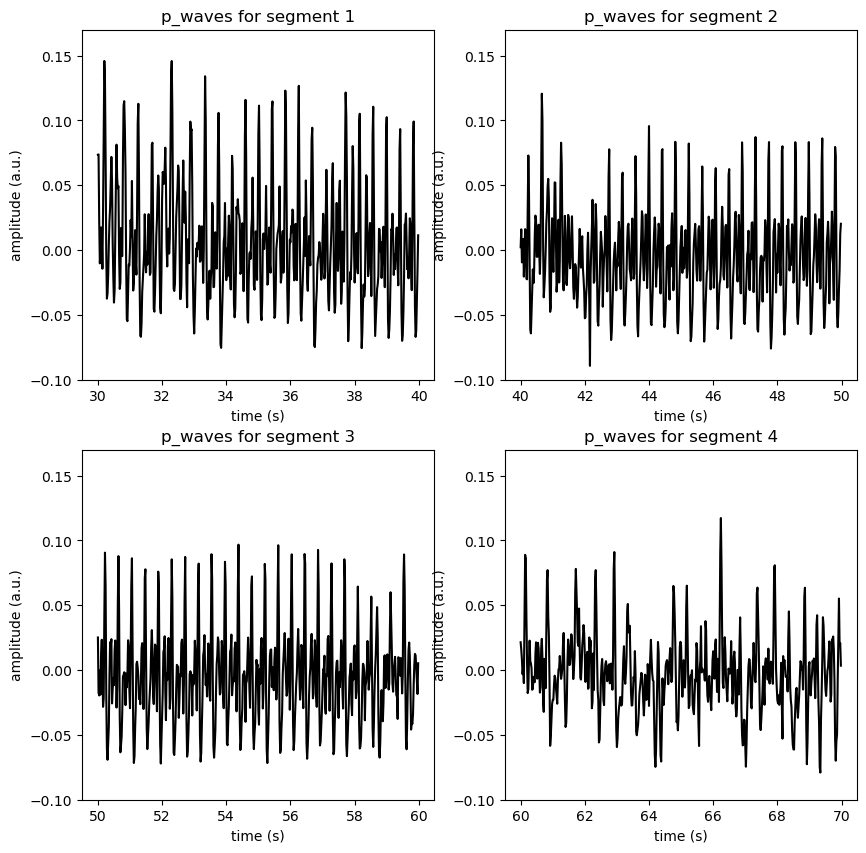

In [21]:
py.figure(4,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    py.plot(t_p_wave[idx], p_wave[idx], 'k')
    py.xlabel('time (s)')
    py.ylabel('amplitude (a.u.)')
    py.ylim([-0.1,0.17]) # Added line to notice the differences easier
    py.title('p_waves for segment '+str(n+1))


<br>
    We compute the autocorelation of the p_wave signal.<br>
    In order to dircard the modulation of the baseline we first apply a<br>
    high-pass filter with a cut-off frequency of 0.5 Hz.<br>
    <br>
    Q: Do you see a specific pattern that permits to characterize the atrial<br>
        fibrilation?<br>
    Q: Discuss the organisation of the signals. Which one is the more organised,<br>
        which one is closer to a noise?<br>

### Answer

The P wave should be a regular lobe before the PR segment., meaning there should not be so many peaks in our segments since most of the time our signal should not be identical. These peaks are due to the fibrillatory waves in the heart.

The segment that looks the most like noise is the fourth one, since it does not show peaks apart from where $k = 0$, which corresponds to the autocorrelation of noise.


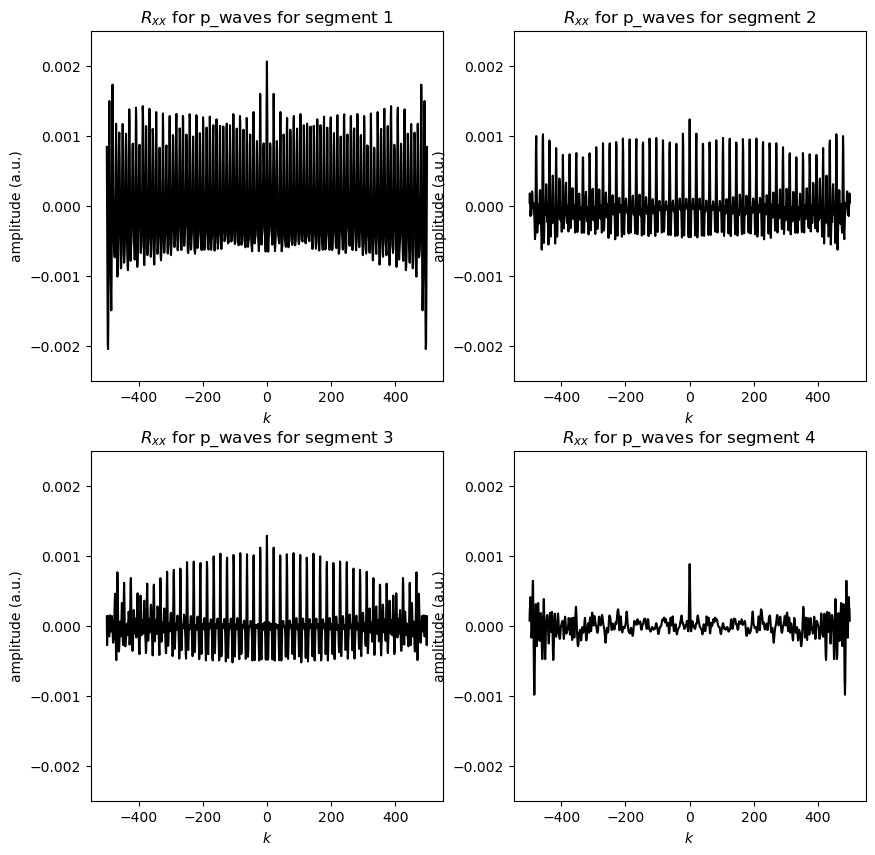

In [22]:
py.figure(5,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    rxx_p_wave = np.correlate(p_wave[idx], p_wave[idx], mode='full') 
    rxx_p_wave /= np.correlate(np.ones(len(idx)), np.ones(len(idx)), mode='full')
    k = np.arange(len(rxx_p_wave))-len(rxx_p_wave)//2
    py.plot(k, rxx_p_wave, 'k')
    py.xlabel('$k$')
    py.ylabel('amplitude (a.u.)')
    py.ylim([-0.0025,0.0025]) # Added line to notice the differences easier
    py.title('$R_{xx}$ for p_waves for segment '+str(n+1))


<br>
    Compute the PSD of the p_wave signal.<br>
    Q: What do you see?<br>
    Q: Which one is the more organised?<br>
    Q: Which ones looks like a noise?<br>
    Q: Which ones exhibit a sustained repolarisation loop?<br>


## Answer

This shows that segment 4 looks like a noise signal with very low power at each frequency compared to the other signals. As we stated before, segment 3 looks very regular, it has very distinct high-power frequencies, hence this is the most organised segment.

The one exhibiting a sustained repolarisation loop is the segment 4, as we can see low amplitudes in the low frequencies. There are also a lot of irregularities in this PSD.


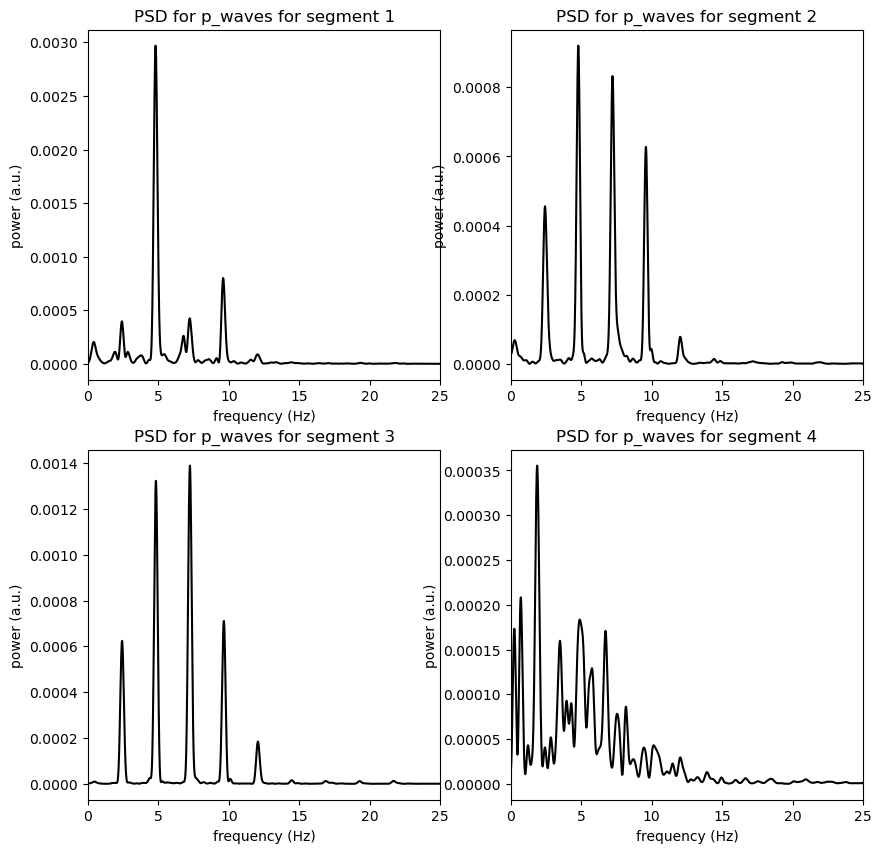

In [24]:
py.figure(7, figsize=[10,10])
for n in range(len(segments)-1):
    idx = np.arange(segments[n], segments[n+1])
    f, P_WAVE = sp.welch(p_wave[idx], nperseg=250, nfft=4096, noverlap=100, fs=p_wave_fs)
    py.subplot(2, 2, int(n+1))
    py.plot(f, P_WAVE, 'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.xlim(0,25)
    py.title('PSD for p_waves for segment '+str(n+1))